# A Primer on Scipy Functions
https://docs.scipy.org/doc/scipy/reference/

### Before running this notebook, we need to make sure the `geopy` package is installed.

Most people were able to do this on Day 1 of class, but some people had trouble. If so, we have a few options. 


In general, we can install a new package by opening a terminal, activating our `pyclass24` environment and typing something like the following:
`conda install -c conda-forge geopy` or `mamba install -c conda-forge geopy`

This can also be done inside your Notebook with the command:

`!conda install -c conda-forge --yes geopy  # note the ! and --yes syntax`

--------

An example of this is commented out below if you need it (you should only need to do install once, not every time you run the Notebook).

Another option if this somehow fails is installing with `pip`:
`!pip install geopy` in a Notebook
or 
`pip install geopy` in your terminal. 

While this should work for `geopy`, use caution with `pip` for more complicated installations, as it is possible to wreck the compatibility in your Python environment. previous students have occasionally run into issues with `pip` wrecking other packages in their Python environment, so fair warning!

In [1]:
### Uncomment the below if needed 
#  - you should only need to run one of the two, and only once, for the installation to work.

# preferred: 
#!conda install -c conda-forge --yes geopy

# otherwise: 
#!pip install geopy 


In [2]:
### Import packages (there are many)

import pandas as pd
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
from geopy.distance import geodesic # this won't work if your installation failed...
import matplotlib.pyplot as plt


### `scipy.stats` has many statistical functions.

These are very useful for statistical analysis and simulations. 

Here, we can simulate a soccer game by modeling each teams average goals per game as a Poisson process (https://en.wikipedia.org/wiki/Poisson_distribution).

In [3]:
# Average goals scored per game for two teams
agg1 = 1.5
agg2 = 2.0

# Number of games to play
ngames = 20

In [4]:
# Sample Poisson distributions
goals1 = stats.poisson.rvs(agg1, size=ngames, random_state=1)
goals2 = stats.poisson.rvs(agg2, size=ngames, random_state=2)
print(goals1)
print(goals2)
print()

# Print results
n1, n2, nT = 0, 0, 0
for nn in range(ngames):
    print("Team 1 scores: {:}, Team 2 scores: {:}".format(goals1[nn], goals2[nn]))
    if goals1[nn] == goals2[nn]:
        print(" ---> Tie!")
    elif goals1[nn] > goals2[nn]:
        print(" ---> Team 1 Wins!")
    else:
        print(" ---> Team 2 Wins!")

[2 1 0 0 1 2 0 1 2 0 0 3 2 0 0 1 2 1 2 3]
[1 2 1 2 2 1 4 1 1 0 1 0 1 1 3 2 4 2 4 2]

Team 1 scores: 2, Team 2 scores: 1
 ---> Team 1 Wins!
Team 1 scores: 1, Team 2 scores: 2
 ---> Team 2 Wins!
Team 1 scores: 0, Team 2 scores: 1
 ---> Team 2 Wins!
Team 1 scores: 0, Team 2 scores: 2
 ---> Team 2 Wins!
Team 1 scores: 1, Team 2 scores: 2
 ---> Team 2 Wins!
Team 1 scores: 2, Team 2 scores: 1
 ---> Team 1 Wins!
Team 1 scores: 0, Team 2 scores: 4
 ---> Team 2 Wins!
Team 1 scores: 1, Team 2 scores: 1
 ---> Tie!
Team 1 scores: 2, Team 2 scores: 1
 ---> Team 1 Wins!
Team 1 scores: 0, Team 2 scores: 0
 ---> Tie!
Team 1 scores: 0, Team 2 scores: 1
 ---> Team 2 Wins!
Team 1 scores: 3, Team 2 scores: 0
 ---> Team 1 Wins!
Team 1 scores: 2, Team 2 scores: 1
 ---> Team 1 Wins!
Team 1 scores: 0, Team 2 scores: 1
 ---> Team 2 Wins!
Team 1 scores: 0, Team 2 scores: 3
 ---> Team 2 Wins!
Team 1 scores: 1, Team 2 scores: 2
 ---> Team 2 Wins!
Team 1 scores: 2, Team 2 scores: 4
 ---> Team 2 Wins!
Team 1 scores

In [5]:
### League Table

print("Team 1 won: ", np.sum(goals1 > goals2))
print("Team 2 won: ", np.sum(goals2 > goals1))
print("Number of ties:", np.sum(goals1 == goals2))


Team 1 won:  6
Team 2 won:  12
Number of ties: 2


### `linregress` - Calculate a linear least-squares regression for two sets of measurements

`slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)`
* `slope`: slope of the regression line
* `intercept`: intercept of the regression line
* `rvalue`: correlation coefficient
* `pvalue`: two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.
* `stderr`: standard error of the estimated slope.

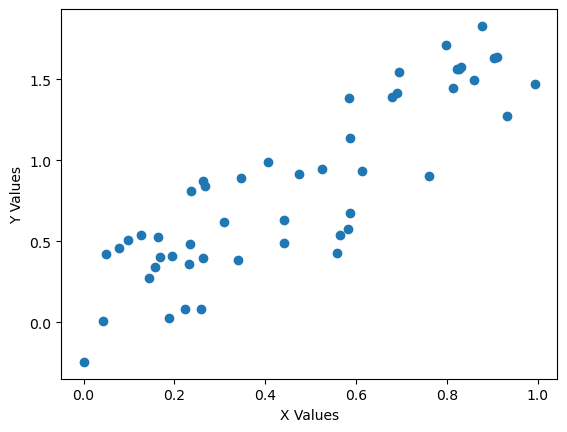

In [6]:
# Generate some data
x = np.random.random(50)
myslope = 1.6
y = myslope*x + np.random.random(50) - 0.5
plt.plot(x, y, 'o')
plt.xlabel('X Values')
plt.ylabel('Y Values');

In [7]:
# Fit line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('slope {:6.2f}, intercept {:6.2f}'.format(slope, intercept))
print('correlation coefficient {:6.3f}, p value {:8.5f}'.format(r_value, p_value))
print('standard error {:6.3f}'.format(std_err))

slope   1.62, intercept   0.08
correlation coefficient  0.872, p value  0.00000
standard error  0.131


In [8]:
# Create a line for plotting
xmin = np.min(x)
xmax = np.max(x)
xi = np.array([xmin, xmax])
yi = xi*slope + intercept

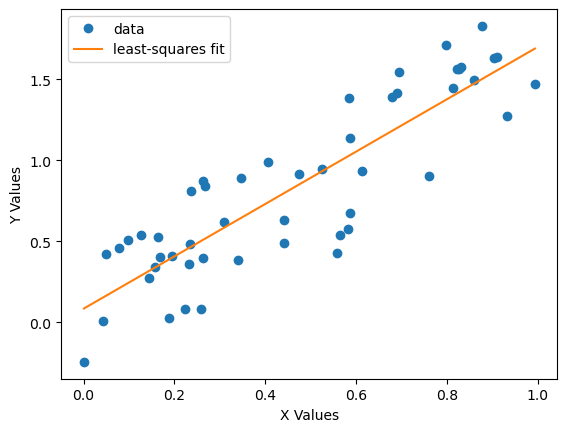

In [10]:
# Plot results
plt.plot(x, y, 'o', label = 'data')
plt.plot(xi, yi, label = 'least-squares fit')
plt.xlabel('X Values')
plt.ylabel('Y Values');
plt.legend();

### `interp1d` - linear or cubic interpolation

The idea here is to fit an interpolant to a finite set of data points. With the fit in hand, you can evaluate the interpolant at any (in bounds) point of your choosing.

### `f = interp1d(x, y, kind='type');` `yval=f(xval)`
* Default is `kind='linear'`

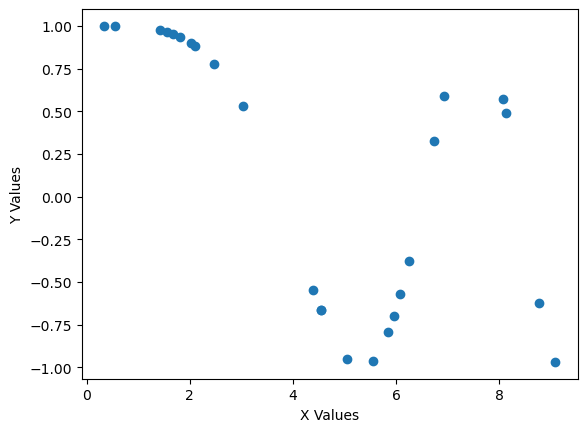

In [11]:
# Generate some data
x = 10.0 * np.random.random(25)
y = np.cos(-x**2 / 9.0)
plt.plot(x, y, 'o')
plt.xlabel('X Values')
plt.ylabel('Y Values');

In [12]:
# Fit interpolants
f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y, kind='cubic')

In [13]:
# Evaluate the interpolant at 50 data points
xi = np.linspace(np.min(x), np.max(x), 50)
yi1 = f1(xi)
yi2 = f2(xi)

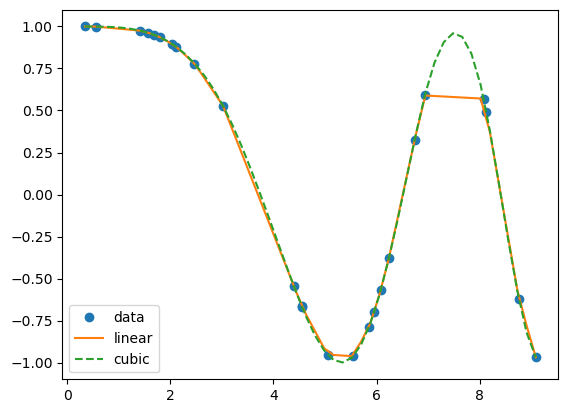

In [14]:
# Plot results
plt.plot(x, y, 'o', xi, yi1, '-', xi, yi2, '--')
plt.legend(['data', 'linear', 'cubic'], loc='best');

## Griddata - interpolate 2-D data onto a grid

#### Read in data that we will grid

In [15]:
xval, yval, zval = np.loadtxt('lecture18_data_subset.txt', unpack=True)

#### Plot the values: recall that `plt.scatter` lets you color the points by value.

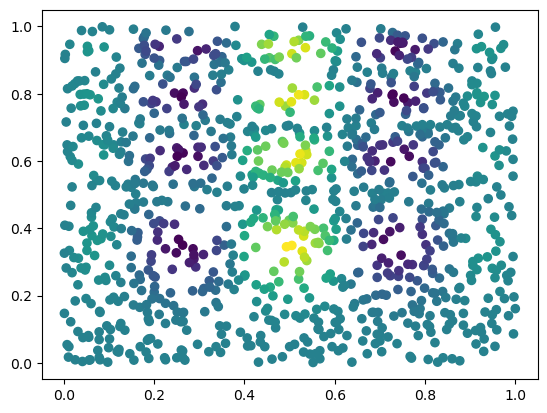

In [16]:
plt.scatter(xval, yval, c=zval, s=35);

#### `grid_z = griddata(points, values, (grid_x, grid_y), method='type')`
* `method` types: `'nearest'`, `'linear'`, `'cubic'`

#### The first parameter, `points` is a set of x,y pairs (2D `numpy array`).

In [17]:
points = np.stack([xval, yval], axis=1)
print(points.shape) # Shape
print(points[:5]) # Print the first 5 pairs

(1000, 2)
[[0.185 0.067]
 [0.146 0.027]
 [0.913 0.435]
 [0.802 0.351]
 [0.47  0.43 ]]


#### The second parameter, `values`, are the values at each x, y position (1D  `numpy array`)

In [18]:
print(zval.shape) # shape
print(zval[:5]) # Print the first 5 values

(1000,)
[-0.    -0.     0.017 -0.127  0.122]


#### `(grid_x, grid_y)` are the grid values. We can create these with `np.meshgrid()`.

In [19]:
# Find the range of x and y coordinate values
print(np.min(xval), np.max(xval))
print(np.min(yval), np.max(yval))

0.001 1.0
0.001 1.0


In [20]:
# Create x coordinate array
x = np.linspace(0, 1, 101)
print(x)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [21]:
# Create y coordinate array
# - this doesn't have to have same increment as x
y = np.linspace(0, 1, 201)
print(y)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.

In [22]:
# Create the mesh
grid_x, grid_y = np.meshgrid(x, y) 
print(grid_x.shape, grid_y.shape)

(201, 101) (201, 101)


In [23]:
# Print first 5 values in the first 5 rows for x grid
print(grid_x[:5, :5]) 

[[0.   0.01 0.02 0.03 0.04]
 [0.   0.01 0.02 0.03 0.04]
 [0.   0.01 0.02 0.03 0.04]
 [0.   0.01 0.02 0.03 0.04]
 [0.   0.01 0.02 0.03 0.04]]


In [24]:
# Print first 5 values in first 5 rows for y grid
print(grid_y[:5, :5]) 

[[0.    0.    0.    0.    0.   ]
 [0.005 0.005 0.005 0.005 0.005]
 [0.01  0.01  0.01  0.01  0.01 ]
 [0.015 0.015 0.015 0.015 0.015]
 [0.02  0.02  0.02  0.02  0.02 ]]


#### Create grids using 3 different methods

In [25]:
## We pick interpolation method with the method parameter

# nearest neighbor interpolation
grid_z0 = griddata(points, zval, (grid_x, grid_y), method='nearest')
print(grid_z0.shape)

# linear interpolation
grid_z1 = griddata(points, zval, (grid_x, grid_y), method='linear')
print(grid_z1.shape)

# cubic interpolation
grid_z2 = griddata(points, zval, (grid_x, grid_y), method='cubic')
print(grid_z2.shape)

(201, 101)
(201, 101)
(201, 101)


#### Plot the results

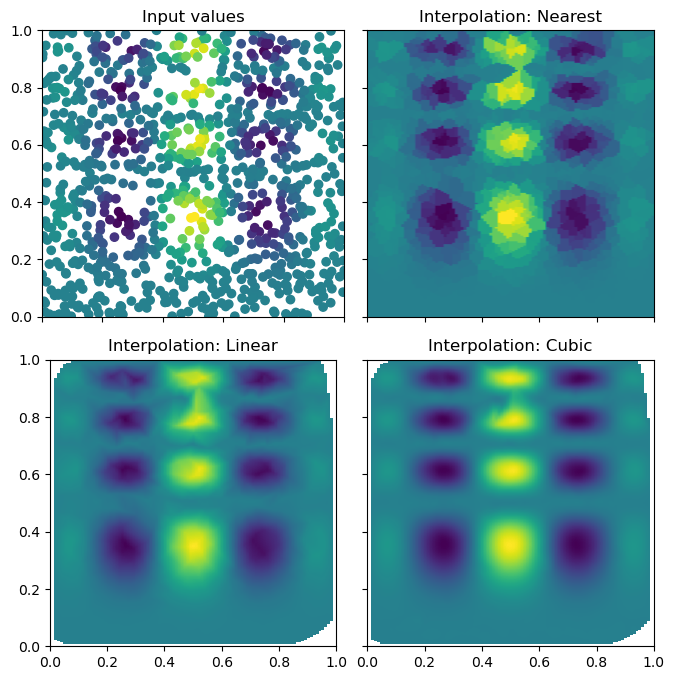

In [26]:
# create 2x2 subplots
fig, axi = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.15, wspace=0.05)

# plot input data
axi[0,0].scatter(xval, yval, c=zval);
axi[0,0].set_xlim([0, 1])
axi[0,0].set_ylim([0, 1])
axi[0,0].set_title('Input values')

# plot interpolations
axi[0,1].imshow(grid_z0, extent=(0, 1, 0, 1), origin='lower')
axi[0,1].set_title('Interpolation: Nearest')
axi[1,0].imshow(grid_z1, extent=(0, 1, 0, 1), origin='lower')
axi[1,0].set_title('Interpolation: Linear')
axi[1,1].imshow(grid_z2, extent=(0, 1, 0, 1), origin='lower')
axi[1,1].set_title('Interpolation: Cubic')

# show results
plt.show()

### Calculate distances on the globe between (lat,lon) pairs using `geodesic`

Note that by default, `geopy` will actually assume the "WGS-84" ellipsoid for this calculation.

usage: `distKM = geodesic((lat0, lon0), (lat1, lon1)).km`

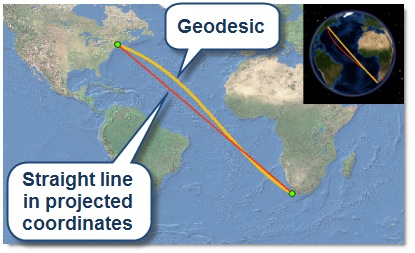
[Figure courtesy ESRI]


#### Example usage

In [27]:
# How many km's are in a degree of longitude?
dist = geodesic((0.0, 0.0), (0.0, 1.0)).km
print("1 degree of longitude is {:7.3f}km at 0°N".format(dist))

# What about at 30 degree N?
dist = geodesic((30.0, 0.0), (30.0, 1.0)).km
print("1 degree of longitude is {:7.3f}km at 30°N".format(dist))

1 degree of longitude is 111.319km at 0°N
1 degree of longitude is  96.486km at 30°N


#### Read in a `DataFrame` and parse dates

In [28]:
# load data
df = pd.read_csv('lecture18_london1.csv', parse_dates=['Date'])
df.head()

,Date,Longitude,Latitude,Altitude
0,2018-11-06 08:30:00,-0.180750,51.512184,25.1
1,2018-11-06 08:31:00,-0.180423,51.511518,22.2
2,2018-11-06 08:32:00,-0.180346,51.510942,22.8
3,2018-11-06 08:33:00,-0.179977,51.510209,23.2
4,2018-11-06 08:34:00,-0.179616,51.509484,23.2


#### Calculate distance to next point in the `DataFrame`

`geodesic` can be used to calculate distances in km or miles:
* `geodesic((lat1, lon1), (lat2, lon2)).km`
* `geodesic((lat1, lon1), (lat2, lon2)).miles`

In [29]:
# Extrace these series for later
lat = df["Latitude"]
lon = df["Longitude"]
nrow = len(lat)
print(nrow)

18


In [30]:
# compute distance incremements between subsequent points
dist = np.zeros(nrow)
dist[0] = np.nan # can't do this for first point
for i in range(1, nrow): # first point at zero distance
    dist[i] = (geodesic((lat[i-1], lon[i-1]),(lat[i], lon[i]))).km

# add this as a column to the dataframe
df["distance"] = dist
df.head()

,Date,Longitude,Latitude,Altitude,distance
0,2018-11-06 08:30:00,-0.180750,51.512184,25.1,NaN
1,2018-11-06 08:31:00,-0.180423,51.511518,22.2,0.077497
2,2018-11-06 08:32:00,-0.180346,51.510942,22.8,0.064307
3,2018-11-06 08:33:00,-0.179977,51.510209,23.2,0.085481
4,2018-11-06 08:34:00,-0.179616,51.509484,23.2,0.084466


#### Calculate speeds. First, calculate time between points. 

We'll can use the pandas function `.shift()` to do this. We will convert the result to hours.

In [31]:
# use shift() to calculate elapsed time between measurements
dt = df['Date'] - df['Date'].shift() # a time delta
df['dt'] = dt / np.timedelta64(1, 'h') # a float
df.head()

,Date,Longitude,Latitude,Altitude,distance,dt
0,2018-11-06 08:30:00,-0.180750,51.512184,25.1,NaN,NaN
1,2018-11-06 08:31:00,-0.180423,51.511518,22.2,0.077497,0.016667
2,2018-11-06 08:32:00,-0.180346,51.510942,22.8,0.064307,0.016667
3,2018-11-06 08:33:00,-0.179977,51.510209,23.2,0.085481,0.016667
4,2018-11-06 08:34:00,-0.179616,51.509484,23.2,0.084466,0.016667


In [32]:
# distance = speed * time
df["speed"] = df['distance'] / df['dt']
df.head()

,Date,Longitude,Latitude,Altitude,distance,dt,speed
0,2018-11-06 08:30:00,-0.180750,51.512184,25.1,NaN,NaN,NaN
1,2018-11-06 08:31:00,-0.180423,51.511518,22.2,0.077497,0.016667,4.649840
2,2018-11-06 08:32:00,-0.180346,51.510942,22.8,0.064307,0.016667,3.858432
3,2018-11-06 08:33:00,-0.179977,51.510209,23.2,0.085481,0.016667,5.128864
4,2018-11-06 08:34:00,-0.179616,51.509484,23.2,0.084466,0.016667,5.067960


#### Calculate the total distance and average speed

In [33]:
print('Total Distance: {:.3f} km'.format(df["distance"].sum()))

Total Distance: 1.381 km


In [34]:
print('Average Speed: {:.2f} km/hr'.format(df["speed"].mean()))

Average Speed: 4.88 km/hr


# Summary
* `scipy.stats` provides many useful statistical functions
* `linregress` can do simple, least-squares fits to data
* `interp1d` and `griddata` can be used for interpolations
* the `geodesic` module can be used to compute geographic distances between points